In [5]:
import pandas as pd


df_borrower = pd.read_csv("/content/Borrower.txt", sep="\t")

print('borrower shape : ',df_borrower.shape)
df_borrower.head()


borrower shape :  (100000, 17)


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,numOpenCreditLines1Year,revolvingBalance,revolvingUtilizationRate,numDerogatoryRec,numDelinquency2Years,numChargeoff1year,numInquiries6Mon
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,6,14301,49.02,0,19,10,0
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,4,18262,72.40,1,0,0,0
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,5,10799,66.27,0,1,1,0
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,3,15272,61.05,1,0,0,3
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,10,19316,56.39,2,14,7,1


In [6]:
df_loan = pd.read_csv("/content/Loan.txt", sep="\t")


print('loan shape : ',df_loan.shape)
df_loan.head()


loan shape :  (100000, 11)


,loanId,memberId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,1888978,2305095,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,1299695,2610493,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,1875016,2491679,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,1440478,2092798,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,1124634,2633077,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current


In [7]:
df = pd.merge(df_borrower, df_loan, on='memberId', how='inner')

print("Merged DataFrame (first 5 rows):")
display(df.head())

print("\nMerged DataFrame Info:")
df.info()

print("\nShape of the merged DataFrame:")
print(df.shape)


Merged DataFrame (first 5 rows):


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,...,loanId,date,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,...,1888978,12/10/2014,debtconsolidation,0.0,25190.0,60 months,6.25,490,E3,Current
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,...,1299695,9/15/2014,debtconsolidation,0.0,21189.0,60 months,10.49,455,B3,Current
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,...,1875016,9/11/2014,debtconsolidation,0.0,29908.0,60 months,9.11,622,B2,Current
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,...,1440478,4/22/2016,homeimprovement,0.0,13053.0,48 months,11.89,343,B3,Current
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,...,1124634,2/3/2016,debtconsolidation,0.0,24613.0,60 months,15.13,587,A3,Current



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   memberId                  100000 non-null  int64  
 1   residentialState          100000 non-null  object 
 2   yearsEmployment           100000 non-null  object 
 3   homeOwnership             100000 non-null  object 
 4   annualIncome              100000 non-null  int64  
 5   incomeVerified            100000 non-null  int64  
 6   dtiRatio                  100000 non-null  float64
 7   lengthCreditHistory       100000 non-null  int64  
 8   numTotalCreditLines       100000 non-null  int64  
 9   numOpenCreditLines        99033 non-null   float64
 10  numOpenCreditLines1Year   100000 non-null  int64  
 11  revolvingBalance          100000 non-null  int64  
 12  revolvingUtilizationRate  100000 non-null  float64
 13  numDerogatoryRec     

In [8]:
df['loanStatus'].value_counts()


,count
loanStatus,
Current,89996
Default,10004


In [9]:
df['defaultFlag'] = df['loanStatus'].map({
    'Current': 0,
    'Default': 1
})

print(df['defaultFlag'].value_counts())
df[['loanStatus', 'defaultFlag']].head()


defaultFlag
0    89996
1    10004
Name: count, dtype: int64


,loanStatus,defaultFlag
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0


In [10]:
df.isnull().sum()


,0
memberId,0
residentialState,0
yearsEmployment,0
homeOwnership,0
annualIncome,0
incomeVerified,0
dtiRatio,0
lengthCreditHistory,0
numTotalCreditLines,0
numOpenCreditLines,967


In [11]:
# Numeric columns → fill with median
df['numOpenCreditLines'] = df['numOpenCreditLines'].fillna(df['numOpenCreditLines'].median())
df['isJointApplication'] = df['isJointApplication'].fillna(df['isJointApplication'].median())
df['loanAmount'] = df['loanAmount'].fillna(df['loanAmount'].median())

# Categorical column → fill with mode
df['term'] = df['term'].fillna(df['term'].mode()[0])

# Check again
df.isnull().sum()


,0
memberId,0
residentialState,0
yearsEmployment,0
homeOwnership,0
annualIncome,0
incomeVerified,0
dtiRatio,0
lengthCreditHistory,0
numTotalCreditLines,0
numOpenCreditLines,0


In [12]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year, month as numeric features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop original date if not needed
df = df.drop(columns=['date'])

df.head()


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,...,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,loanStatus,defaultFlag,year,month
0,2305095,NM,10+ years,rent,56471,1,16.80,6,11,9.0,...,0.0,25190.0,60 months,6.25,490,E3,Current,0,2014,12
1,2610493,WA,2-5 years,rent,55038,0,19.99,22,8,7.0,...,0.0,21189.0,60 months,10.49,455,B3,Current,0,2014,9
2,2491679,MS,< 1 year,rent,56610,1,14.33,5,8,5.0,...,0.0,29908.0,60 months,9.11,622,B2,Current,0,2014,9
3,2092798,TX,6-9 years,own,54887,1,14.80,12,14,7.0,...,0.0,13053.0,48 months,11.89,343,B3,Current,0,2016,4
4,2633077,MA,2-5 years,rent,53522,1,10.14,4,21,19.0,...,0.0,24613.0,60 months,15.13,587,A3,Current,0,2016,2


In [13]:
from sklearn.preprocessing import LabelEncoder

# Drop original loanStatus string column
df = df.drop(columns=['loanStatus'])

# List of categorical columns
cat_cols = ['residentialState', 'yearsEmployment', 'homeOwnership',
            'purpose', 'term', 'grade']

# Apply Label Encoding
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # store encoders if needed later

df.head()


,memberId,residentialState,yearsEmployment,homeOwnership,annualIncome,incomeVerified,dtiRatio,lengthCreditHistory,numTotalCreditLines,numOpenCreditLines,...,purpose,isJointApplication,loanAmount,term,interestRate,monthlyPayment,grade,defaultFlag,year,month
0,2305095,30,1,2,56471,1,16.80,6,11,9.0,...,2,0.0,25190.0,2,6.25,490,14,0,2014,12
1,2610493,45,2,2,55038,0,19.99,22,8,7.0,...,2,0.0,21189.0,2,10.49,455,5,0,2014,9
2,2491679,23,4,2,56610,1,14.33,5,8,5.0,...,2,0.0,29908.0,2,9.11,622,4,0,2014,9
3,2092798,41,3,1,54887,1,14.80,12,14,7.0,...,5,0.0,13053.0,1,11.89,343,5,0,2016,4
4,2633077,17,2,2,53522,1,10.14,4,21,19.0,...,2,0.0,24613.0,2,15.13,587,2,0,2016,2


In [14]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['defaultFlag'])
y = df['defaultFlag']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train:")
print(y_train.value_counts())
print("Target distribution in test:")
print(y_test.value_counts())


Train shape: (80000, 27)
Test shape: (20000, 27)
Target distribution in train:
defaultFlag
0    71997
1     8003
Name: count, dtype: int64
Target distribution in test:
defaultFlag
0    17999
1     2001
Name: count, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(scale_pos_weight)

8.996251405722854


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gaussian NB": GaussianNB(),
    "XGBoost": XGBClassifier(
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        use_label_encoder=False
    ),
}


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report





for name, model in models.items():
    print(f"\n================= {name} =================")

    # Models requiring scaled data
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("------------------------------------------------------------")


================= Logistic Regression =================
Accuracy : 0.83735
Precision: 0.36301969365426695
Recall   : 0.8290854572713643
F1 Score : 0.5049459747374829

Confusion Matrix:
[[15088  2911]
 [  342  1659]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     17999
           1       0.36      0.83      0.50      2001

    accuracy                           0.84     20000
   macro avg       0.67      0.83      0.70     20000
weighted avg       0.92      0.84      0.86     20000

------------------------------------------------------------

================= Random Forest =================
Accuracy : 0.92415
Precision: 0.8261455525606469
Recall   : 0.30634682658670664
F1 Score : 0.44695588771418154

Confusion Matrix:
[[17870   129]
 [ 1388   613]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     17999
           1       0.83   

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy : 0.88285
Precision: 0.4494082840236686
Recall   : 0.7591204397801099
F1 Score : 0.5645790745214644

Confusion Matrix:
[[16138  1861]
 [  482  1519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     17999
           1       0.45      0.76      0.56      2001

    accuracy                           0.88     20000
   macro avg       0.71      0.83      0.75     20000
weighted avg       0.92      0.88      0.90     20000

------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


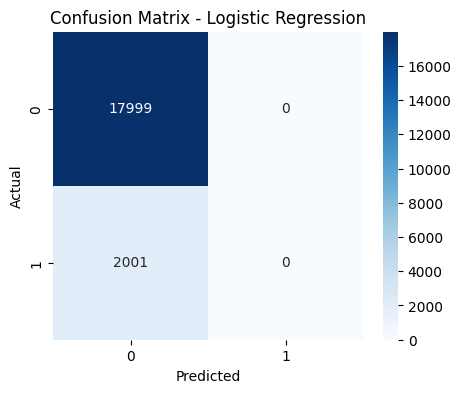

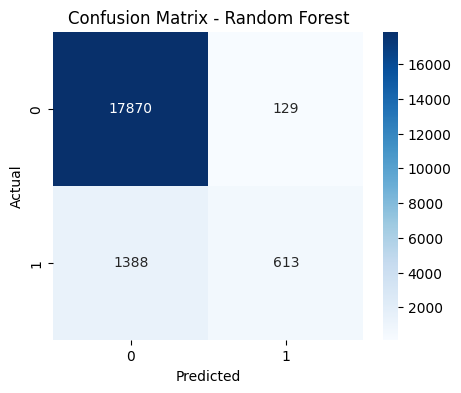

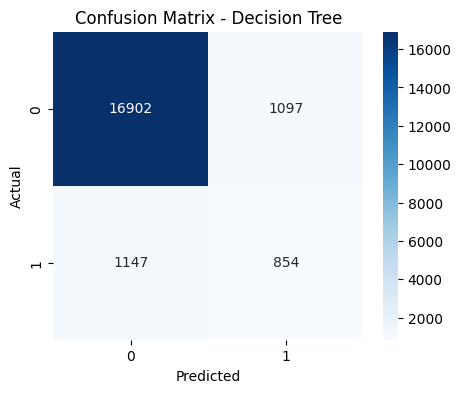

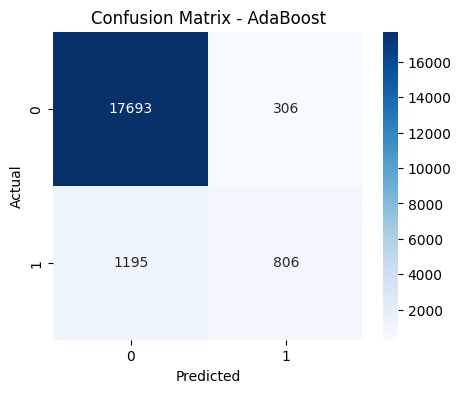

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


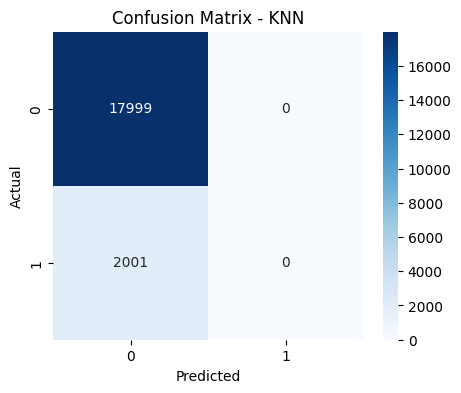

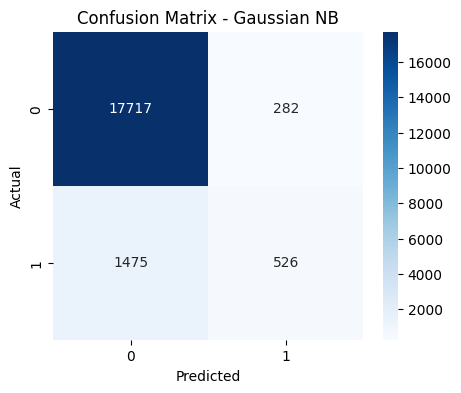

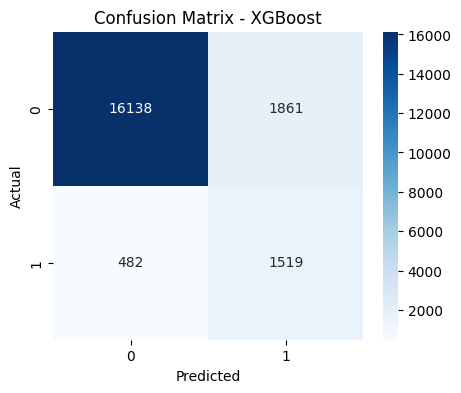

In [19]:

from sklearn.metrics import confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



for name, model in models.items():
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()